Task:

Load the captured „sample_X.tif” RGB image. 
Calculate the center of the shape on the image.
tasks:
- load and show the image;
- transform it into grayscale;
- calculate and show its histogram;
- make some arithmetic operations (brightness, contrast, gamma …etc) on the image;
- make some filtering (edge sharpening, find edges, Laplacian, …etc) on the image;
- remove noise and unwanted regions;
- threshold and binarize the image;
- calculate the center of the shape.

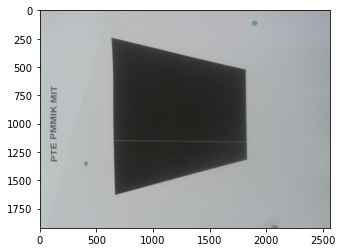

In [1]:
from  PIL import Image
import matplotlib.pyplot as plt
import numpy as np

sample = Image.open('./sample_m.jpg')

# load and show the image;
plt.figure()
plt.imshow(sample)

In [2]:
# transform it into grayscale
sample_gray = sample.convert("L")

Text(0.5, 1.0, 'Histogram')

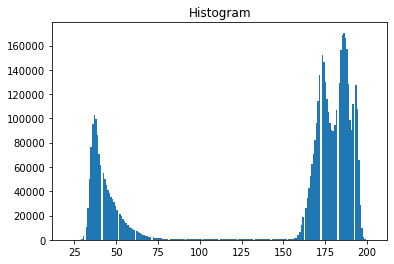

In [3]:
# calculate and show its histogram;
sample_gray_arr = np.array(sample_gray)
plt.hist(sample_gray_arr.flatten(), bins=200)
plt.title("Histogram")

Text(0.5, 1.0, '150% brightness')

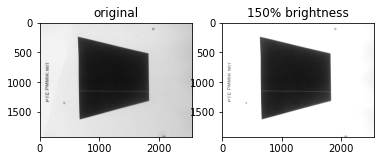

In [21]:
# make some arithmetic operations (brightness, contrast, gamma …etc) on the image;
# change the brightness of the image

def brighten_image(img_arr, brightness):
    brightened = np.zeros(img_arr.shape)
    for i, row in enumerate(img_arr):
        for j, col in enumerate(row):
            if (brightness >= 1.0):
                brightened[i][j] = np.minimum(255, img_arr[i][j] * brightness)
            else:
                brightened[i][j] = np.maximum(0, img_arr[i][j] - (255 * (1.0 - brightness)))
    return brightened;

plt.figure()
plt.subplot(1,2,1)
plt.imshow(brighten_image(sample_gray_arr, 1), 'gray')
plt.title('original')

plt.subplot(1,2,2)
plt.imshow(brighten_image(sample_gray_arr, 1.5), 'gray')
plt.title('150% brightness')


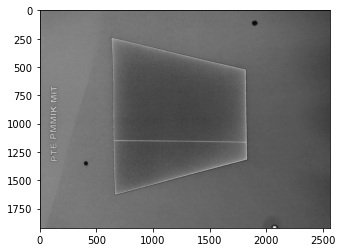

In [26]:
# make some filtering (edge sharpening, find edges, Laplacian, …etc) on the image;

from scipy import ndimage
vertical_filter = np.array([
    [0, 1],
    [0, 1]
])
plt.imshow(ndimage.convolve(sample_gray_arr, vertical_filter), 'gray')